<a href="https://colab.research.google.com/github/Carolinadmz/Portafolio/blob/main/Ejercicios/TIC_TAC_KERAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importar las librerías necesarias
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

In [2]:
#Cargar el conjunto de datos
file_path ="/content/drive/MyDrive/Colab Notebooks/2025-IA/tic-tac-toe.data"

In [3]:
# Definir un diccionario de mapeo para convertir símbolos a números
symbol_map = {'x': 2, 'o': 1, 'b': 0, 'positive': 1, 'negative': 0}

# Cargar el archivo y convertir caracteres usando un generador
data = np.loadtxt(file_path, delimiter=',', dtype=str)  # Cargar como texto primero

# Aplicar la conversión de símbolos a números
numeric_data = np.vectorize(lambda x: symbol_map[x])(data)  # Vectorizar la conversión

# Convertir a tipo numérico
numeric_data = numeric_data.astype(int)

# Ver las primeras 5 filas
print(numeric_data[:5])


[[2 2 2 2 1 1 2 1 1 1]
 [2 2 2 2 1 1 1 2 1 1]
 [2 2 2 2 1 1 1 1 2 1]
 [2 2 2 2 1 1 1 0 0 1]
 [2 2 2 2 1 1 0 1 0 1]]


In [4]:
# Separar características (X) y etiquetas (y)
X = numeric_data[:, :-1]  # Todas las columnas excepto la última
Y = numeric_data[:, -1]   # Última columna (clase)

In [5]:
X.shape

(958, 9)

In [6]:
X

array([[2, 2, 2, ..., 2, 1, 1],
       [2, 2, 2, ..., 1, 2, 1],
       [2, 2, 2, ..., 1, 1, 2],
       ...,
       [1, 2, 1, ..., 2, 1, 2],
       [1, 2, 1, ..., 2, 1, 2],
       [1, 1, 2, ..., 1, 2, 2]])

In [7]:
ohe = OneHotEncoder()
# X_ohe = ohe.fit_transform(X).toarray()
X = ohe.fit_transform(X)

In [8]:
X

<958x27 sparse matrix of type '<class 'numpy.float64'>'
	with 8622 stored elements in Compressed Sparse Row format>

In [9]:
X=X.toarray()

In [10]:
#Dividir el conjunto de datos al 50%
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5)


In [11]:
#Crear MLP
model = Sequential()
model.add(Dense(12, input_dim=27, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
#Compilar el modelo
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [13]:
#Entrenar el modelo
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=200)

Epoch 1/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.5458 - loss: 0.2447 - val_accuracy: 0.5741 - val_loss: 0.2419
Epoch 2/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5763 - loss: 0.2364 - val_accuracy: 0.6305 - val_loss: 0.2347
Epoch 3/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6369 - loss: 0.2298 - val_accuracy: 0.6409 - val_loss: 0.2289
Epoch 4/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6542 - loss: 0.2251 - val_accuracy: 0.6597 - val_loss: 0.2241
Epoch 5/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6823 - loss: 0.2163 - val_accuracy: 0.6660 - val_loss: 0.2200
Epoch 6/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6678 - loss: 0.2119 - val_accuracy: 0.6743 - val_loss: 0.2160
Epoch 7/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6956 - loss: 0.2042 - val_accuracy: 0.6806 - val_loss: 0.2125
Epoch 8/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6476 - loss: 0.2135 - val_accuracy: 0.6910 - 

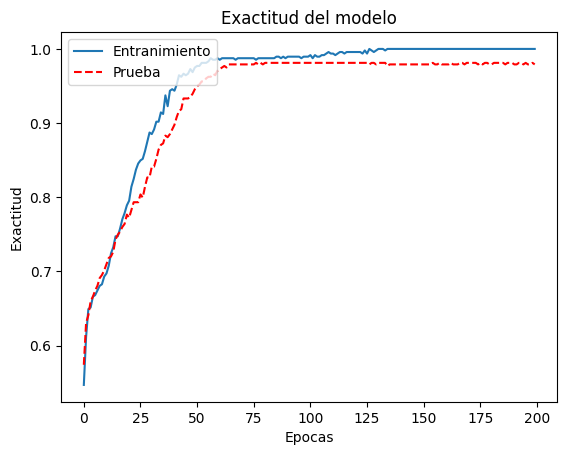

In [14]:
#Grafica de desempeño
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'], 'r--')
plt.title('Exactitud del modelo')
plt.ylabel('Exactitud')
plt.xlabel('Epocas')
plt.legend(['Entranimiento', 'Prueba'], loc='upper left')
plt.savefig('precisionDiabetesKeras.png', dpi=300)
plt.show()

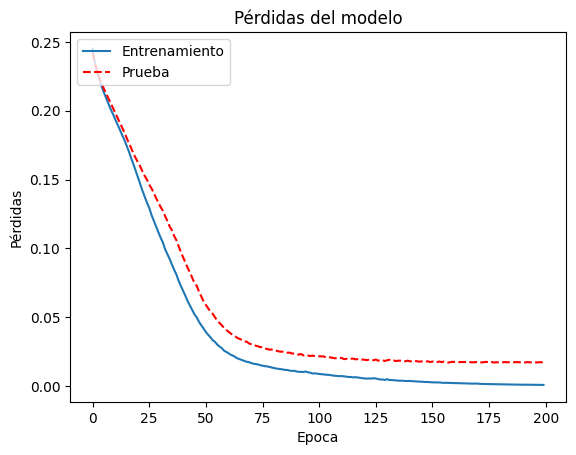

In [15]:
#Grafica de perdidas
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],'r--')
plt.title('Pérdidas del modelo')
plt.ylabel('Pérdidas')
plt.xlabel('Epoca')
plt.legend(['Entrenamiento', 'Prueba'], loc='upper left')
plt.savefig('perdidasDiabetesKeras.png', dpi=300)
plt.show()

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 12)                  │             336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,433 (5.60 KB)

 Trainable params: 477 (1.86 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 956 (3.74 KB)